<a href="https://colab.research.google.com/github/HosseinEyvazi/World-Population-dataset-EDA/blob/main/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World population EDA
# EDA (exploratory data analysis) steps :

1.  import libraries
2.  load data
3.  data understanding
*    df.shape
*    df.head() , df.tail() , df.samples()
*    df.df.info
*    df.describe()
*    df.select_dtype(include:'object' / include:'number')
*    feature relations : correclation , mutual information , statistical tests
4. Remove duplicate
5. null handling
6. Skewness handling
6. Outlier handling
8. filter data for advances analysis
9. Scale the numeric data
10. Encoding the categorical data
11. Feature engineering

*   dimensionality reduction (e.g : PCA , tSNE , UMAP)
*   Manual feature engineering






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# these 4 packages are very small size
# but in heavy packages we have to import specific part of them (usable parts)

## to get the file from kaggle

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/world-population-dataset")
for (root,dirs,files) in os.walk(path, topdown=True):
  print(files)

100%|██████████| 15.7k/15.7k [00:00<00:00, 21.8MB/s]

Extracting files...
['world_population.csv']


## to convert the downloaded file to D frame

In [ ]:
df = pd.read_csv(path+'/'+files[0] )

In [ ]:
df.shape

(234, 17)

In [ ]:
df.head(6)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45


In [ ]:
df.tail()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [ ]:
df.describe().T # a high number of fetaures that is why we transposed the table (avoiding to exist a scroller)

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020 Population,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015 Population,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010 Population,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000 Population,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990 Population,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980 Population,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970 Population,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

to make df smaller  

In [ ]:
df['Rank']=df['Rank'].astype('int16')
df['Area (km²)']=df['Area (km²)'].astype('float16')
df['World Population Percentage']=df['World Population Percentage'].astype('float16')
df['Density (per km²)']=df['Density (per km²)'].astype('float16')
df['Growth Rate']=df['Growth Rate'].astype('float16')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int16  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


to get the top 10 rank countries

In [ ]:
df.query('Rank <= 10').sort_values(['Rank'])

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,inf,146.875000,1.000000,17.875000
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,inf,431.000000,1.006836,17.765625
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,inf,36.093750,1.003906,4.238281
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,inf,144.625000,1.006836,3.449219
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,inf,267.500000,1.019531,2.960938
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,inf,236.625000,1.024414,2.740234
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,inf,25.281250,1.004883,2.699219
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,inf,1160.000000,1.010742,2.150391
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,inf,8.460938,0.997070,1.809570
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,inf,64.937500,1.005859,1.599609


country with highest growth rate

In [ ]:
max_growth_val = df['Growth Rate'].max()
max_gr_country = df.query('`Growth Rate` == @max_growth_val')
# max_gr_country = df.query(f'`Growth Rate` == {max_growth_val}') # this is also true
print("this is country with highest growth rate")
max_gr_country

this is country with highest growth rate


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33856.0,96.6875,1.069336,0.040009


to get the all numeric feature names

In [ ]:
df_numeric_ft = df.select_dtypes(include = 'number')
numeric_cols = df_numeric_ft.columns
numeric_cols

Index(['Rank', '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

to get the 3rd text type feature

In [ ]:
df_txt_ft = df.select_dtypes(include = 'object')
non_numeric_cols = df_txt_ft.columns[2]

to get all non-numeric features

In [ ]:
df_numeric_ft = df.select_dtypes(exclude = 'number') # pandas instead of str says object !
non_numeric_cols = df_numeric_ft.columns
non_numeric_cols

Index(['CCA3', 'Country/Territory', 'Capital', 'Continent'], dtype='object')

to find correclation between numberic features

In [ ]:
corr_matrix = df[numeric_cols].corr()#.iloc[ : , 5:6]


to show all one correlation

In [ ]:
rows_with_zero = corr_matrix[corr_matrix == 1] # this returns the whole of table contain NaN and some other values . because we pass the whole of matrix again . this is different from when we pass a column of that matrix
rows_with_zero

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022 Population,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020 Population,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015 Population,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010 Population,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000 Population,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990 Population,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1980 Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970 Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Area (km²),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


to find correlation matrix heat map

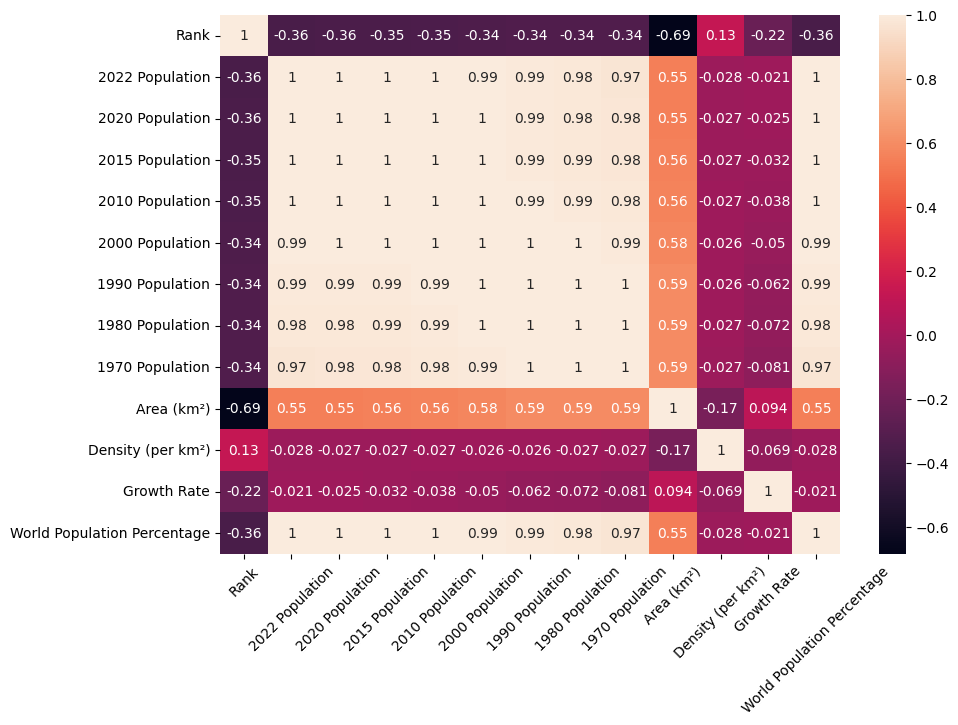

In [ ]:
plt.figure(figsize=(10,7))
ax =sns.heatmap(corr_matrix , annot=True) # annot is for numers in boxes
ax.set_xticklabels(labels = corr_matrix.columns ,rotation=45) ;

remove duplicate

In [ ]:
# check duplicate
# run each line
df.duplicated().sum() # this is special for duplicated rows . for duplicated columns ? correlation
# sum default is on columns


0

In [ ]:
df = df.drop_duplicates() # no changes
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,inf,63.062500,1.025391,0.520020
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28752.0,98.875000,0.995605,0.040009
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,inf,18.859375,1.016602,0.560059
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199.0,222.500000,0.982910,0.000000
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468.0,170.625000,1.009766,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142.0,81.500000,0.995117,0.000000
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,inf,2.166016,1.018555,0.010002
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,inf,63.812500,1.021484,0.419922
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,inf,26.593750,1.028320,0.250000


this dataset has not got any null values .
we have to add some null values .

In [ ]:
# Using .loc to set specific values to NaN
df.loc[2, 'Capital'] = np.nan
df.loc[4, '2000 Population'] = np.nan
df.loc[3, '1980 Population'] = np.nan
df.loc[1, '1990 Population'] = np.nan
df.loc[0, 'Continent'] = np.nan
df.loc[6, 'Continent'] = np.nan
df.loc[6, '2022 Population'] = np.nan
df.loc[4, '2022 Population'] = np.nan
df.loc[1, '1970 Population'] = np.nan

df.head(7)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,NaN,41128771.0,38972230,33753499,28189672,19542982.0,10694796.0,12486631.0,10752971.0,inf,63.062500,1.025391,0.520020
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849,2882481,2913399,3182021.0,NaN,2941651.0,NaN,28752.0,98.875000,0.995605,0.040009
2,34,DZA,Algeria,NaN,Africa,44903225.0,43451666,39543154,35856344,30774621.0,25518074.0,18739378.0,13795915.0,inf,18.859375,1.016602,0.560059
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189,51368,54849,58230.0,47818.0,NaN,27075.0,199.0,222.500000,0.982910,0.000000
4,203,AND,Andorra,Andorra la Vella,Europe,NaN,77700,71746,71519,NaN,53569.0,35611.0,19860.0,468.0,170.625000,1.009766,0.000000
5,42,AGO,Angola,Luanda,Africa,35588987.0,33428485,28127721,23364185,16394062.0,11828638.0,8330047.0,6029700.0,inf,28.546875,1.031250,0.449951
6,224,AIA,Anguilla,The Valley,NaN,NaN,15585,14525,13172,11047.0,8316.0,6560.0,6283.0,91.0,174.250000,1.006836,0.000000


find nulls

In [ ]:
# run each of lines

df.isna()
df.isna().sum() # sum default is on columns


,0
Rank,0
CCA3,0
Country/Territory,0
Capital,1
Continent,2
2022 Population,2
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,1


null is equal to NaN in python

In [ ]:
# run each of lines
df.isnull()
df.isnull().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,1
Continent,2
2022 Population,2
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,1


number of nulls in whole of dataframe  

In [ ]:
df.isna().sum().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,1
Continent,2
2022 Population,2
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,1


null handling is very depend on scenario:


1.   dopping the column contain null (df.dropna()) (not recommended)

1.   dropping the row contain null (df.dropna(axis=1)) (when number of datas is very very bigger than null values and each data is not very important . for example in this dataset Countries are very important )

1.   imputing null with avg of that column

2.   imputing null with median of that column (outliers can't effect in this choice. for example china is an outlier when a field in iran is missed)

2.   imputing null with mode (this is for categorical features)

7.   [imputing null with KNN](https://images.app.goo.gl/rsriefnvm349Mzbe8) \
but how to choose hyper paramter k ? expermintally (set it , then check the result )

8. machine learning models to predict (regression , random forest)

9. neural network



drop rows (we recommend this , based on dataset )

In [ ]:
print(df.shape)
df_temp = df.dropna()
print(df_temp.shape)

(234, 17)
(228, 17)


drop columns ( not recommended )

In [ ]:
df_temp = df.dropna(axis=1)
print(df.shape)
print(df_temp.shape)

(234, 17)
(234, 10)


impute using mean or median (this is special for numeric datas) \
what should we do about categorical ? u can convert them to numeric

In [ ]:
df_temp.loc[:, numeric_cols] = df.loc[:, numeric_cols].fillna(df.loc[:, numeric_cols].mean())  #mean
# df_temp.loc[:, numeric_cols] = df.loc[:, numeric_cols].fillna(df.loc[:, numeric_cols].median())  #median
df_temp.isna().sum().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
2020 Population,0
2015 Population,0
2010 Population,0
Area (km²),0
Density (per km²),0
Growth Rate,0
World Population Percentage,0


In [ ]:
# run each line
df.loc[:, 'Continent'].mode()
df_temp2= df.loc[:, 'Continent'].fillna(df.loc[:, 'Continent'].mode()[0]) #mode
df_temp2.isna().sum()

,Continent
0,Africa


imputing using KNN imputer

In [ ]:
from sklearn.impute import KNNImputer


#knn imputer has got issue with inf (not with null) unlike pandas fillna method (pandas)
df.replace([np.inf, -np.inf], np.nan, inplace=True)


imputer = KNNImputer(n_neighbors=3)
pd_temp3 = imputer.fit_transform(df[numeric_cols])
df = pd.DataFrame(pd_temp3 , columns=numeric_cols) #to convert ndarray to dataframe
df.isna().sum()

,0
Rank,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0
1990 Population,0
1980 Population,0
1970 Population,0
Area (km²),0


[Skewness vs Kurtosis](https://images.app.goo.gl/epTHqQnAG9mDNCr56)

how to handle skewness ⁉ \
To mitigate the effects of skewness, preprocessing techniques can be used: \


* Log Transformation: Reduces right-skewed data by compressing large values. (distribution shouldnt contain 0 values) \
* Square Root or Cube Root Transformation: Handles moderate skewness. \
* Box-Cox Transformation: Flexible method for reducing skewness. \
* Winsorizing: Limits extreme values. \
* Outlier Removal: Removes or adjusts extreme skewed values. \
* Standardization/Normalization: Adjusts scale but may not always handle skewness.

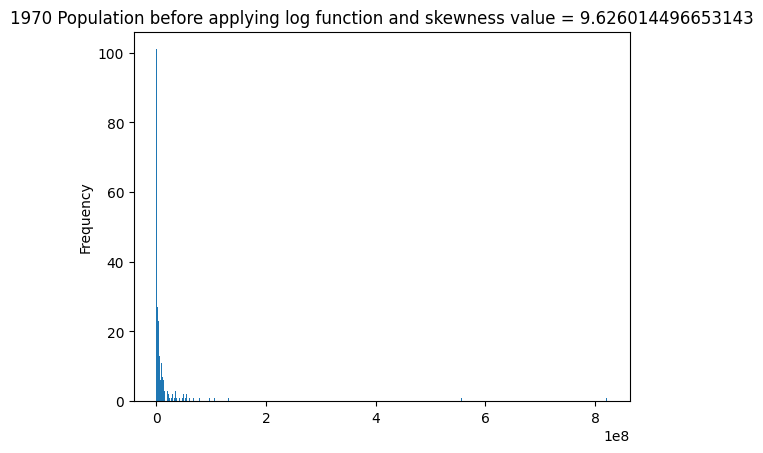

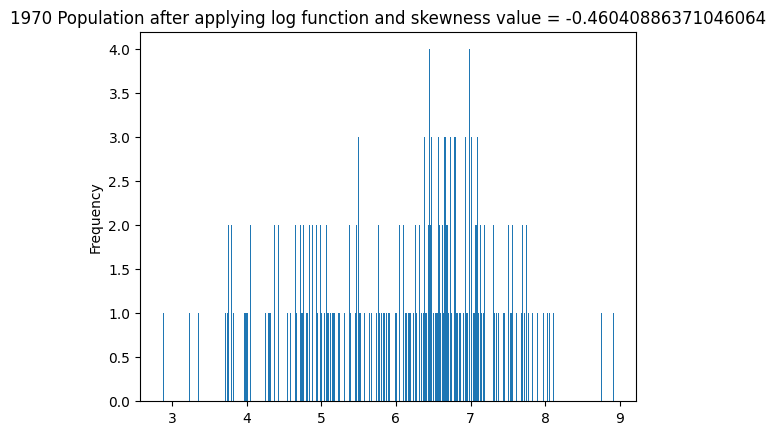

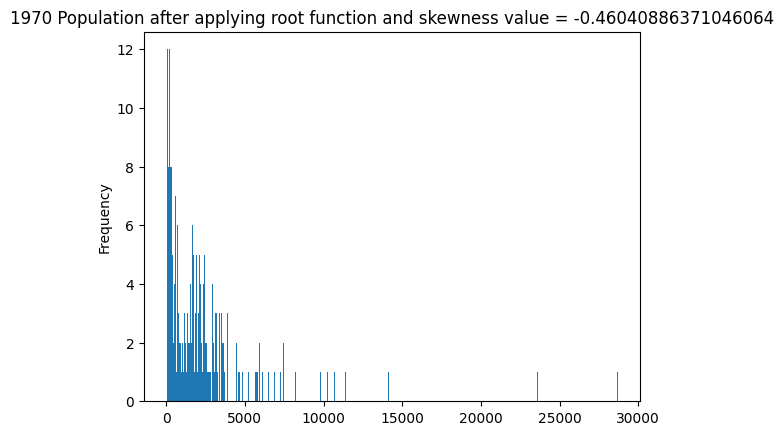

In [ ]:
from scipy import stats
sk = df['1970 Population'].skew()
df['1970 Population'].plot.hist(bins=500 , title=f'1970 Population before applying log function and skewness value = {sk}')
plt.show()
# logarithm
df_scaled = np.log10(df['1970 Population'])
sk = df_scaled.skew()
df_scaled.plot.hist(bins=500 , title=f'1970 Population after applying log function and skewness value = {sk}')
plt.show()
# logarithm
df_scaled2 = np.sqrt(df['1970 Population'])
sk = df_scaled.skew()
df_scaled2.plot.hist(bins=500 , title=f'1970 Population after applying root function and skewness value = {sk}')
plt.show()



# transformed_data

# The error you’re encountering when trying to apply scipy.stats.boxcox indicates an issue with the data in your '1970 Population' column.
# The Box-Cox transformation requires all data points to be positive, since it involves computing logarithms. The presence of zero or negative values will cause the transformation to fail.


Outlier handling using :
1. DBSCAN
2. Box plot
3. ....

Box plot outlier deletion \
note : in this dataset india and china are outliers in population . but we can't delete these outliers ! \
Therefore : outlier handling is very depend on dataset concept

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def outlier_handling(df):
  outliers = pd.DataFrame([])
  for col in df.columns :
    Q1 = df.loc[:,col].quantile(.25)
    Q3 = df.loc[:,col].quantile(.75)

    IQR = Q3 - Q1
    # print(IQR)
    lower_bound = Q1 - 1.5 * IQR
    # print(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    # print(upper_bound)
    outlier_row = df[(df.loc[:,col] < lower_bound) | (df.loc[:,col] > upper_bound)]
    rows_contain_outliers = pd.concat([outlier_row , outliers])
    df.loc[:,col] = df.loc[:,col].clip(lower=lower_bound , upper = upper_bound) # clip method map values that are higher than upper bound or lower than lower bound to higher bound itself or lower bound

    # dfcol = pd.DataFrame(df[col])

    # outliers[col] = df[col]
    # print(outliers)

  return df , rows_contain_outliers



df_o , outliers = outlier_handling(df[numeric_cols])
outliers

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
16,8,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,539.777344,1.010742,2.150391
27,7,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,25.281250,1.004883,2.699219
41,1,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,146.875000,1.000000,17.875000
55,15,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,20151733.0,inf,42.218750,1.032227,1.240234
57,14,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,110.750000,1.015625,1.389648
63,12,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,111.750000,1.025391,1.549805
68,23,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,117.125000,1.001953,0.810059
74,19,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,233.500000,0.999512,1.049805
92,2,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,431.000000,1.006836,17.765625
93,4,5.577645e+07,52997022,4.872012e+07,47309195.25,39246948.5,29314013.0,24221963.0,21929160.0,inf,144.625000,1.006836,3.449219
